# ** Automatidata project**
**Translating Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.


# **Visualize a story in Tableau and Python**

# **P.A.C.E FRAMEWORK** 


I will be using the P.A.C.E framework in this task.

**The goal** for this task is to translate data into visual insights 

**The Purpose** for the tasks is to clean, analyze the dataset and the use python libraries to visualize the assessed analises (insights)


## P: Plan 

In this stage, I will consider the following questions where applicable to complete the code response:
1. Identify any outliers: 


*   What methods are best for identifying outliers?
*   How do you make the decision to keep or exclude outliers from any future models?



**answers to the posed questions**
•	Identify outliers.
•	Identify the best methods to examine outliers.
-	You can use the NumPy functions like mean (), and median () to examine the range of data values.
-	Use a box chart, or a Histogram to visualize the distribution of values in the dataset.


After investigating the outliers, I will determine what to do with the outliers found in the data I will be using to construct the regression model. The options to this determination decision can be one of the following: keeping them as they are, deleting them, or reassigning them based on the assumption of the model intended to be built. 
Note: I will only delete the outliers if the analysis proves they are typos, mistakes or errors, else I will assign them if I examine the dataset and conclude it’s a small dataset, or the outliers are necessary for the machine learning model I intend to build… and lastly I may choose to keep them if the model I intend to build is resistant to outliers.


In [1]:
# Import packages and libraries
import pandas as pd
import numpy as np
#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
#time
import datetime as dt


In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

## A: Analyze 

In this stage I will start the DEA process

### Task 2a. Data exploration and cleaning

Given the need for this task, I will start this phase by assessing the data to help me understand it's structure using the appropriate functions like head(), describe(), info(), groupby(), and sortby(). This will be vital for me to know of any mising values, anomalies if any, and the best approach towards these problems. Additionally, I am going put emphasis on the most applicable variables to the stakeholders' need.




In [3]:
# assess and get a few rows of the dataset 
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [4]:
# get the size of the dataset
df.shape

(22699, 18)

In [5]:
# descriptive analysis
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
# programmatic assessment of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

**quick Observations**

* The dataset has 22699 entries and 18 columns with no variable with missing values. 
* Majority of the variables have float64(8) datatype, follwed by int64(7) datatype, and lastly object(3) datatype.
* The average fare amount is 13.24 dollars, with the average tip amount of 2.8 and a total amount of 16.1 dollars. 

However, Based the descriptive analysis results, there are some abnormal values like the min fare amount being -120 dollars and the max fare amount 1000 dollars. Both these values in the fare amount and other variables like total amount do not make sense, hence they will further be investigated.
* All variable are further going to be investigated for a deeper understanding the dataset structure and EDA. 

### Task 2b. Assess whether dimensions and measures are correct

Here, I am going to double check the data types for the applicable columns I selected on the previous step and pay a close attention to the dimensions and measures to assure they are correct. 

I'll also consider the data types of the columns if they make sense? 

### Task 2c. Select visualization type(s)


Now that I know which data columns I’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


**Answers**

The most qualifying columns for thye task are duration, trip distance and total amount.
**Visualizations**

A scatter plot will be helpful to analyze trends, patterns ,and outliers of critical variables like trip distance and total amount.

The bar char with help visualize the average number of trips made per month

The box plot will be helpful to determine the outliers and where the bulk data points reside in the selected varibles (duration, trip distance and total amount)


## C: Construct 

In this stage I will do an extended deeper analysis prior to constructing the model. I am going to create different charts depending on the intended analysis.

### Task 3. Data visualization



### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [7]:
# Convert data columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

**trip distance**

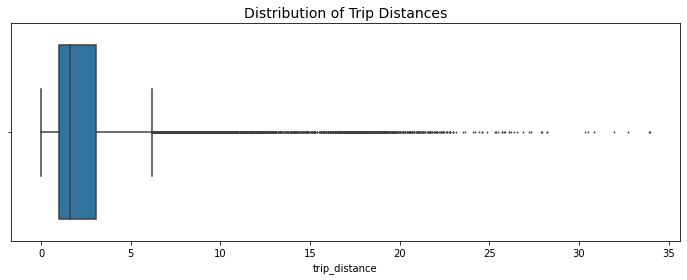

In [8]:
# Box plot of trip_distance
plt.figure(figsize=(12,4))
plt.title('Distribution of Trip Distances', fontsize=14)
sns.boxplot(data=df, x='trip_distance', fliersize=1)


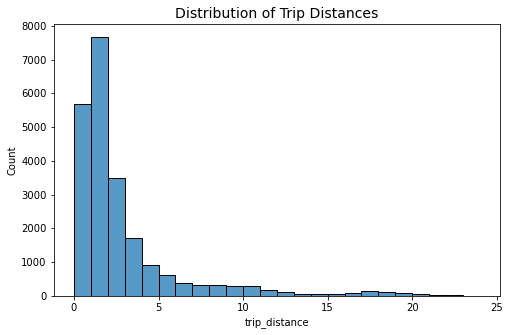

In [9]:
# Histogram of trip_distance
plt.figure(figsize=(8, 5))
plt.title('Distribution of Trip Distances', fontsize=14)
sns.histplot(data=df, x='trip_distance', bins=range(0,25, 1))

The number of trips steeply decreases after 2 miles. Majority of trips are in 2 miles distance. However, the boxplot shows values above 30 miles which seem to outliers given to thge distribution of the values.

**total amount**

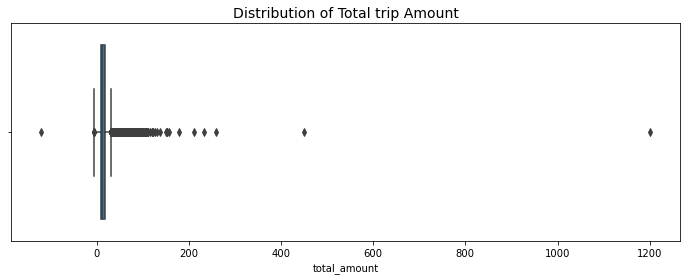

In [10]:
# Box plot of total_amount
plt.figure(figsize=(12,4))
plt.title('Distribution of Total trip Amount', fontsize=14)
sns.boxplot(data=df, x='total_amount', fliersize=5)

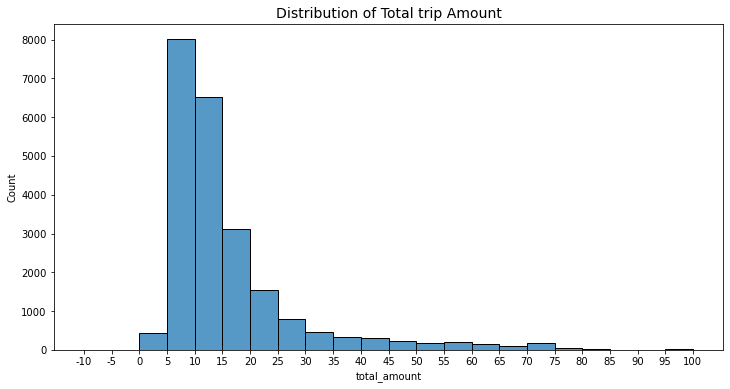

In [11]:
# Histogram of total_amount
plt.figure(figsize=(12,6))
plt.title('Distribution of Total trip Amount', fontsize=14)
ax = sns.histplot(data=df, x='total_amount', bins=range(-10,102,5))
ax.set_xticks(range(-10,102,5))
ax.set_xticklabels(range(-10,102,5));

Majority of the trip amount uniquely skews to rightthe highest amount ranging between 5-15 dollars. However the boxplot shows the maximum total trip amount to be above $1000 which seems to be incorrect or an outlier given to the distribution of the varible's values.

**tip amount**

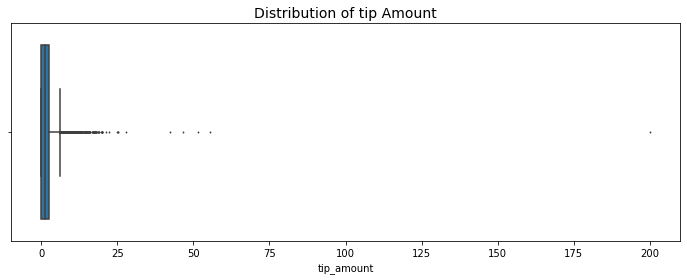

In [12]:
# Box plot of tip_amount
plt.figure(figsize=(12,4))
plt.title('Distribution of tip Amount', fontsize=14)
sns.boxplot(data=df, x='tip_amount', fliersize=1)

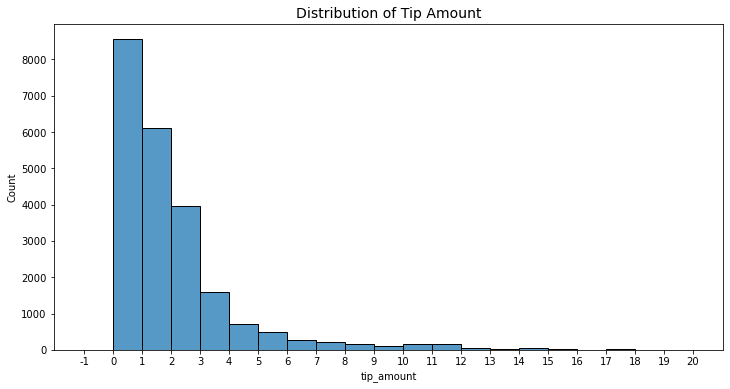

In [13]:
# Histogram of tip_amount
plt.figure(figsize=(12,6))
plt.title('Distribution of Tip Amount', fontsize=14)
ax=sns.histplot(data=df, x='tip_amount', bins= range(-1, 21, 1))
ax.set_xticks(range(-1, 21, 1))
ax.set_xticklabels(range(-1, 21, 1));


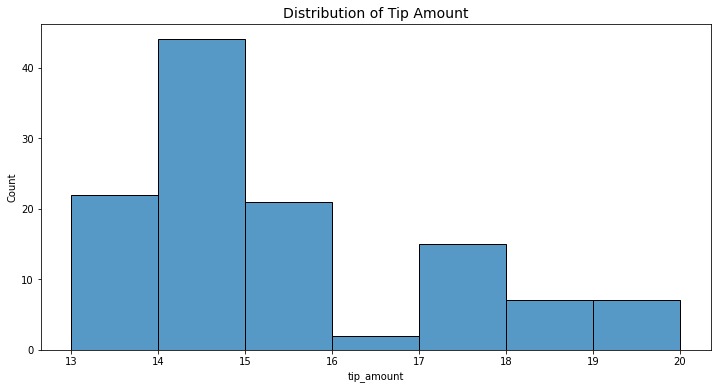

In [14]:
# Histogram of tip amount greater than $13
tip_great_than_12 = df[df['tip_amount']>13]
plt.figure(figsize=(12,6))
plt.title('Distribution of Tip Amount', fontsize=14)
ax=sns.histplot(data=tip_great_than_12, x='tip_amount', bins= range(13, 21, 1))
ax.set_xticks(range(13, 21, 1))
ax.set_xticklabels(range(13, 21, 1));

Majority of the trip tip ranges between $0-3 dollars, but the boxplot displays an outlier of about 200 dollars which will further be investigated.

**tip_amount by vendor**

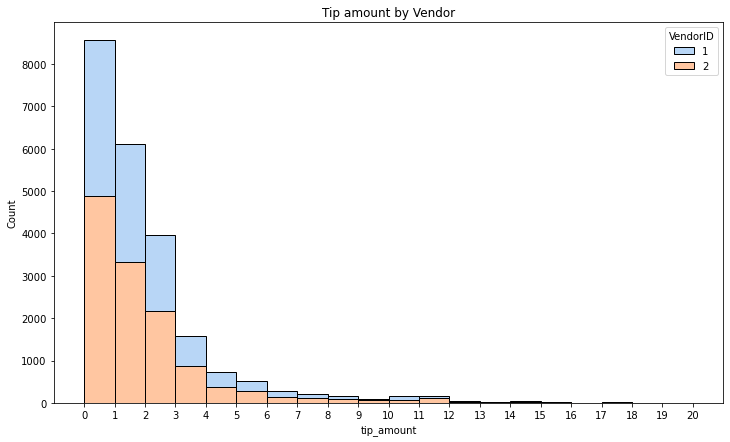

In [15]:
# Histogram of tip_amount by vendor
plt.figure(figsize=(12,7))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(0,21,1))
ax.set_xticklabels(range(0,21,1))
plt.title('Tip amount by Vendor');

It looks like Vendor two's proportion distribution is approximately maintained for all tips, and there's no noticeable differences in tip distributions.


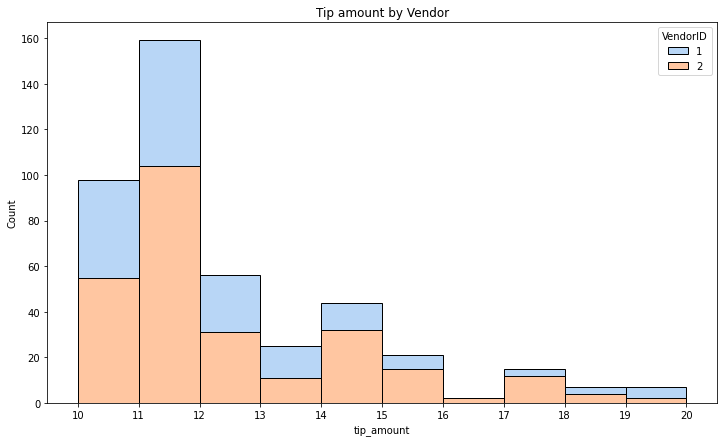

In [16]:
# Create histogram of tip_amount by vendor for tips > $10 
tips_greater_than_10 = df[df['tip_amount'] > 10]
plt.figure(figsize=(12,7))
ax = sns.histplot(data=tips_greater_than_10, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette='pastel')
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tip amount by Vendor');

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [17]:
df.passenger_count.value_counts()

1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: passenger_count, dtype: int64

About 16117 rides had single passenger occupancy rides, 3305 had two, and nearly 455 rides had 4 occupants. Additionally, atleast 33 rides had zero occupancy.These will further be investigated for delete, keep, or reassign options as it doesn't make sense for a ride to have zero passengers.

In [18]:
# Calculate mean tips by passenger_count
avg_tips_by_passenger_count = df.groupby(df.passenger_count).mean()[['tip_amount']]
avg_tips_by_passenger_count

,tip_amount
passenger_count,
0,2.135758
1,1.848920
2,1.856378
3,1.716768
4,1.530264
5,1.873185
6,1.720260


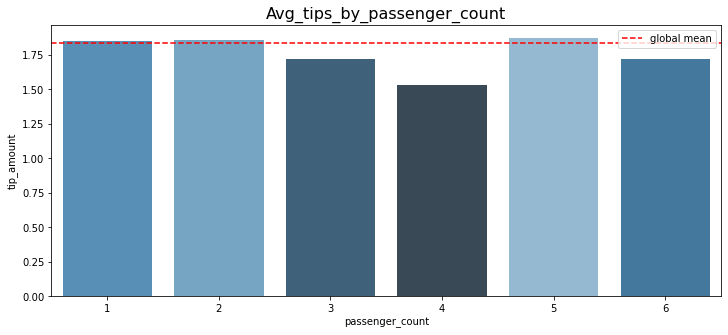

In [19]:
# Bar plot for mean tips by passenger count
data = avg_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Blues_d", len(data))
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,5))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Avg_tips_by_passenger_count', fontsize=16);
          

The average tip amount by passenger count varies slightly little. However, it drastically drops for four-passenger count rides. With the above observations, one would expect that there would be a higher degree of fluctuation due to rides with four passengers especially since they are second least in the entire dataset.

**Create month and day columns**

In [20]:
# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month_name()

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

In [21]:
#check
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


**Plot total ride count by month**

Begin by calculating total ride count by month.

In [22]:
# Get total number of rides for each month
monthly_rides = df.month.value_counts()
display(monthly_rides)

March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: month, dtype: int64

Reorder the results to put the months in calendar order.

In [23]:
# Reorder the monthly ride list so months go in order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: month, dtype: int64

In [24]:
# Show the index
monthly_rides.index

Index(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype='object')

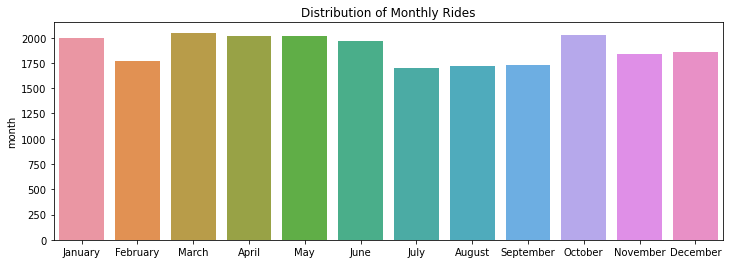

In [25]:
# Create a bar plot of total rides per month
plt.figure(figsize=(12, 4))
plt.title('Distribution of Monthly Rides')
ax = sns.barplot(x=monthly_rides.index, y=monthly_rides)


The monthly rides distribution varies very slightly, but the months of July, August, and September show a noticeable decrease in the number of rides. This could be related to the summer season 

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

In [26]:
# number of rides per day
daily_rides = df.day.value_counts()
daily_rides

Friday       3413
Thursday     3402
Wednesday    3390
Saturday     3367
Tuesday      3198
Sunday       2998
Monday       2931
Name: day, dtype: int64

In [27]:
# reorder days in a proper order
day_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: day, dtype: int64

In [28]:
# display the daily rides index
daily_rides.index

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

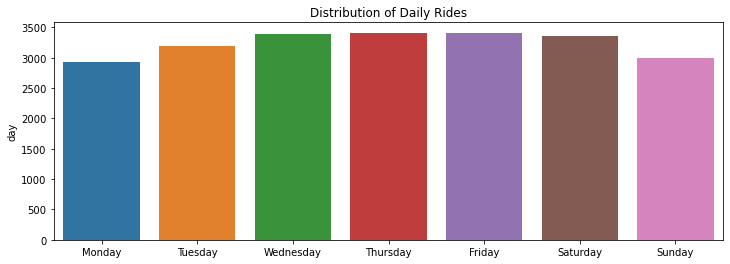

In [29]:
# Barplot of daily rides 
plt.figure(figsize=(12,4))
ax = sns.barplot(x=daily_rides.index, y=daily_rides)
ax.set_title('Distribution of Daily Rides')
ax.set_xticklabels(day_order);

The Barplot shows shows no significant difference on the number of rides daily. However, Majority of the rides happen in mid weekdays ('Wednesday','Thursday','Friday'), and Sunday and Monday have get the list rides in a week.

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

In [30]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [31]:
# Repeat the process, this time for total revenue by day
# daily total revenue
daily_revenue = df.groupby('day').sum()[['total_amount']]
daily_revenue.reindex(index=day_order)

,total_amount
day,
Monday,49574.37
Tuesday,52527.14
Wednesday,55310.47
Thursday,57181.91
Friday,55818.74
Saturday,51195.40
Sunday,48624.06


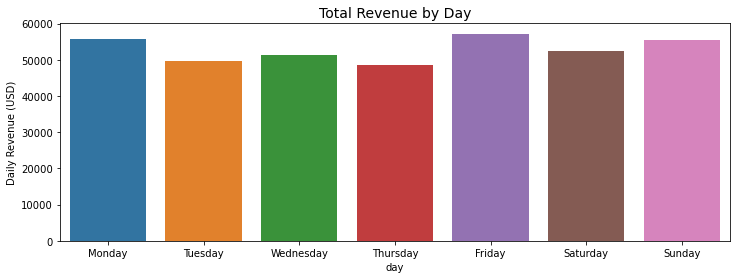

In [32]:
# Create bar plot of total revenue by day
plt.figure(figsize=(12,4))
ax=sns.barplot(data=df, x=daily_revenue.index, y=daily_revenue['total_amount'])
ax.set_title('Total Revenue by Day', fontsize=14)
ax.set_ylabel('Daily Revenue (USD)')
ax.set_xticklabels(day_order);

Friday has the highest gross daily revenue, while Thursday has the least daily gross. 

**Plot total revenue by month**

In [33]:
# Repeat the process, this time for total revenue by month
monthly_revenue = df.groupby('month').sum()[['total_amount']]
monthly_revenue.reindex(index=month_order)

,total_amount
month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


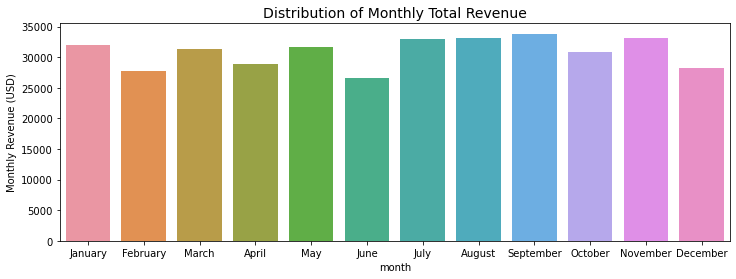

In [34]:
# Create a bar plot of total revenue by month
plt.figure(figsize=(12,4))
ax = sns.barplot(data=df, x=monthly_revenue.index, y=monthly_revenue['total_amount'])
ax.set_title('Distribution of Monthly Total Revenue', fontsize=14)
ax.set_ylabel('Monthly Revenue (USD)')
ax.set_xticklabels(month_order);

September had the highest monthly gross revenue while June had the least monthly gross revenue. 

#### Scatter plot

You can create a scatterplot in Tableau Public, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the following link. Those instructions create a scatterplot showing the relationship between total_amount and trip_distance. Consider adding the Tableau visualization to your executive summary, and adding key insights from your findings on those two variables.

[Tableau visualization guidelines](https://docs.google.com/document/d/1pcfUlttD2Y_a9A4VrKPzikZWCAfFLsBAhuKuomjcUjA/template/preview)

**Plot mean trip distance by drop-off location**

In [35]:
# Get number of unique drop-off location IDs

df['DOLocationID'].nunique()

216

In [36]:
# Calculate the mean trip distance for each drop-off location
avg_trip_distance_per_dropoff = df.groupby('DOLocationID').mean()[['trip_distance']]
display(avg_trip_distance_per_dropoff)
print('--------------------------sorted Values-------------------------------------------------')
# Sort the results in descending order by mean trip distance
sorted_values_trip_distance_per_dropoff = avg_trip_distance_per_dropoff.sort_values(by='trip_distance')
display(sorted_values_trip_distance_per_dropoff)

,trip_distance
DOLocationID,
1,17.027353
4,2.436634
7,3.964944
9,9.305000
10,3.750000
...,...
261,4.935897
262,2.866897
263,2.501951


--------------------------sorted Values-------------------------------------------------


,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


[]

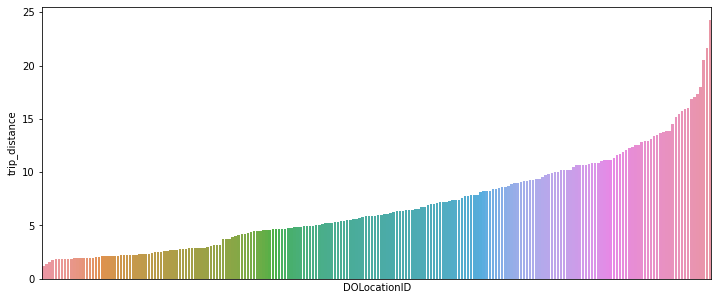

In [37]:
# Create a bar plot of mean trip distances by drop-off location in ascending order by distance
plt.figure(figsize=(12,5))
ax = sns.barplot(data=df, x=sorted_values_trip_distance_per_dropoff.index, \
           y=sorted_values_trip_distance_per_dropoff['trip_distance'],
           order = sorted_values_trip_distance_per_dropoff.index)
ax.set_xticks([])
ax.set_xticklabels([])


The plot above shows that the dropoff locations are evenly distributed hence a good sign. It should also be noted based on the graph that the trip distance increase, or decreased based on the drop off location.

**Histogram of rides by drop-off location**

First, I am going to check whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [38]:
# Check if all drop-off locations are consecutively numbered
df.DOLocationID.max() - int(len(set(df.DOLocationID)))

49

At least 49 numbers don't represent a drop-off location.

To eliminate the spaces in the historgram that these missing numbers would create, I am going to sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

Text(0.5, 0, 'Drop-off Locations')

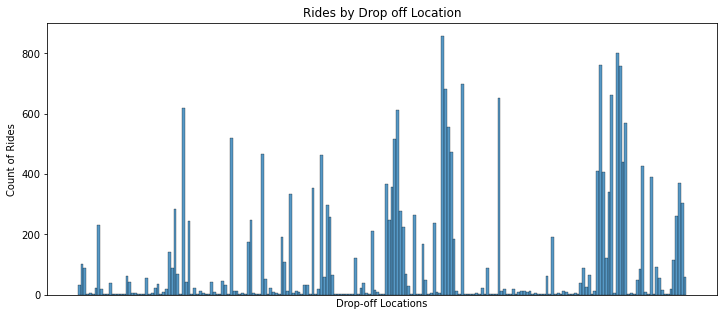

In [39]:
# DOLocationID column is numeric, so sort in ascending order
sorted_dropoffs = df.DOLocationID.sort_values()

# Convert to string
sorted_dropoffs = sorted_dropoffs.astype(str)

# Plot
plt.figure(figsize=(12, 5))
ax = sns.histplot(sorted_dropoffs, bins=range(0, df.DOLocationID.max()+1, 1))
ax.set_xticks([])
ax.set_title('Rides by Drop off Location')
ax.set_ylabel('Count of Rides')
ax.set_xlabel('Drop-off Locations')

The distribution of the drop-off locations is not proportionate since some locations seem to get more rides than the others due unknown reasons that were not included in the data. However being New York, you can assume that the location with more traffic are probably tourist attraction sites like Time Square.


## E: Execute 

In this stage, I am going to share my analyticalobservations with the project stakeholders.

**Quick Observations**

- Based on the dataset visualizations displayed and examined in the analyses above, I learned that at least 49 values in the drop-off location column are actually not drop-off locations, the highest total amount spent on a ride is $5-15, and the majority of trips below 5 miles. Additionally, thye key analyzed variables have outliers as shown in the visualizations above.

- While many questions have been answered in the EDA, other questions would include... What might the outliers in trip_distances, total_amount, and total_tip be? I would also want to know what the the 0 trip_distances with drop-off Locations entail as well as the possibility of affectiong the model? 

- I was to borrow the client's shoes for this project, I would be asking questions like; Does the the pick-up data align well with the drop-off data in terms of time? And while this infor is crutial in determining the trip duration, it can further be examined.


In [40]:
# Examining trip duration
df['trip_duration'] = df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

# check
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


### Conclusion

Applying EDA allowed me to better understand the data's structure, errors, anomalies, as well as to clean and prepare the data for the future model as requested by the client.

I also used different visualizations depending the need and data desired to be displayed to visualize the data structure and outliers before building the model
